# Clasificacion Binaria



* TP: True Positivo (positivo correcto)
* FP: Falso Positivo
* TN: True Negative (dice negativo, es negativo)
* FN: Falso Negativo

$ acc= \frac{(TP+TN)}{(TP+FP+TN+FN)} $

Tenemos a disposicion:

* Support Vector Machine (SVM)
* Naive Bayes
* Nearest Neighbor
* Decision Trees
* Logistic Regresion
* **Neural Network**

Primero vamos a probar lo mas sencillo.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## Darle antes pip install sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [ ]:
sns.set_style('dark')
import matplotlib as mpl


In [3]:
print('Target variables  : ', dataset['target_names'])

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  ['malignant' 'benign']
Unique values of the target variable [0 1]
Counts of the target variable : [212 357]


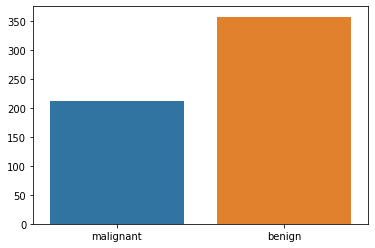

In [6]:
sns.barplot(x=dataset['target_names'], y=counts)
plt.title=("Variables resultado en el dataset")
plt.show()

In [9]:
X = dataset['data']
y = dataset['target']

In [11]:
# Scaler es necesario para que los numeros tengan integridad.
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [12]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)



In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Ahora que tenemos un modelo podemos hacer predicciones
model

LogisticRegression()

In [16]:
predictions = model.predict(X_test)


In [17]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [27]:
import pandas as pd
pd.DataFrame(X_test, columns=dataset['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,1.481735,...,0.029159,0.648570,0.179870,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688
1,-0.260524,1.387014,-0.324127,-0.332729,-0.601368,-0.990992,-0.766849,-0.728400,-0.703240,-0.986314,...,-0.397431,1.392767,-0.475716,-0.435405,-0.152049,-0.941264,-0.638975,-0.830706,-0.738931,-0.890300
2,-0.030472,-0.844644,-0.097993,-0.137624,-1.188483,-0.919734,-0.852851,-0.577763,-0.812768,-0.983478,...,-0.281464,-1.036863,-0.319638,-0.336962,-1.269864,-0.970527,-1.005506,-0.494046,-1.237207,-0.933525
3,0.037691,-0.260550,-0.030853,-0.061970,-2.177683,-0.988149,-0.804137,-0.907410,-0.644825,-0.983478,...,-0.010186,-0.067942,-0.043523,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208
4,-0.311646,-0.202373,-0.385500,-0.372831,-0.464730,-1.263703,-0.793214,-0.507861,-1.258183,-0.590802,...,-0.614867,-0.466909,-0.679153,-0.588344,-1.549975,-1.323648,-1.073966,-0.981753,-1.478256,-1.233324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2.579618,1.787269,2.534473,2.887080,-0.090400,1.210223,1.333347,1.928896,0.355534,0.041449,...,3.052564,1.438363,2.941018,3.627307,0.689600,1.007232,1.486328,2.203194,0.327187,0.156504
139,-1.027362,0.209518,-0.960928,-0.912073,1.127241,0.491962,-0.301813,-0.470460,0.402996,2.129580,...,-1.058024,-0.476680,-1.031818,-0.889826,-0.103829,-0.314031,-0.684551,-0.810759,-0.837615,0.349906
140,-0.507616,-1.633519,-0.536668,-0.530110,-0.450497,-0.782146,-0.743497,-0.579053,-0.447674,-0.668770,...,-0.550672,-1.043377,-0.596944,-0.554943,-0.138898,-0.298127,-0.446594,-0.115817,0.338511,-0.444757
141,-0.169639,-1.943019,-0.167192,-0.272150,2.329937,0.006804,-0.251467,0.429234,2.159100,0.512094,...,-0.453343,-2.147457,-0.473631,-0.483572,0.558093,-0.740244,-0.896170,-0.617229,-0.308601,-0.666975


In [20]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
error = predictions-y_test

In [40]:
error

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [33]:
pepe = X_test[0]
ana = X_test[1]

In [39]:
pd.DataFrame(pepe.reshape(1, -1), columns=dataset['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.206561,0.286311,-0.137124,-0.27926,1.013376,0.806556,0.69932,0.846065,1.111279,1.481735,...,0.029159,0.64857,0.17987,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688


In [36]:
model.predict(pepe.reshape(1, -1))

array([0])

In [37]:
model.predict(ana.reshape(1, -1))


array([1])

Necesitamos entonces calcular la precision de nuestro modelo


In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = cm.ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  88
False Positive(FP) =  3
True Negative(TN)  =  50
False Negative(FN) =  2
Accuracy of the binary classification = 0.965


In [ ]:
#https://www.learndatasci.com/glossary/binary-classification/
